<a href="https://colab.research.google.com/github/Anuj-1996/Maritime_Ship_CO2_Emission_Analysis/blob/main/EU_CO2_emissions_from_maritime_transport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Improvisation of Classification of ship types using KMeans Clustering and Random Forest by analysing EU Maritime CO2 emission data**

For this EDA, the dataset has downloaded from the EU MRV website : https://mrv.emsa.europa.eu/#public/emission-report.

The EU MRV (Monitoring, Reporting, Verification) Regulation entered into force on 1 July 2015, and requires ship owners and operators to annually monitor, report and verify CO2 emissions for vessels larger than 5000 gross tonnage (GT) calling at any EU and EFTA (Norway and Iceland) port.

## Preliminary Dataset

Year wise dataset available on the EU MRV website from 2018 to 2021 in the Excel format. The year-wise dataset downloaded on local drive and merge on the Excel. Also, deleted unnecessory/empty column from the dataset.

Analysis of EU Maritime CO2 Emission Data to Improve Ship Type Classification Combining KMeans Clustering and Random Forest

Improvisation of Classification of ship types using KMeans Clustering and Random Forest by analysing EU Maritime CO2 emission data

In [1]:
#Mounting Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [79]:
#importing libraries
import pandas as pd
import numpy as np

#Chi-Suquare test
import scipy.stats as stats

#visualization Libraries: Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Seaborn
import seaborn as sns
sns.set()

#plotly go and px
import plotly
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab'

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# import plotly.offline as pyo
# # Set notebook mode to work in offline
# pyo.init_notebook_mode()

#uncomment this only exporting to github. Uncomment this, then run and save to github.
# import plotly.io as pio

# pio.renderers

# pio.renderers.default = "svg"

#ignore warnings
import warnings
warnings.filterwarnings("ignore")



In [3]:
# Importing Excel from the drive and converting excel to pandas df
dataset = pd.read_excel('/content/drive/MyDrive/EU_CO2_Emission_Data/2018_2021_EU_ship_emission_dataset.xlsx', parse_dates=['Reporting Period'])

In [4]:
#creating copy of the main dataset
df = dataset.copy()

In [5]:
# remove spaces in columns name
df.columns = df.columns.str.replace(' ','_')


# 1. EDA

## Dataset Overview

In [6]:
# Displaying 1st five rows 
df.head()

,IMO_Number,Name,Ship_type,Reporting_Period,Technical_efficiency_Type,Technical_efficiency_[gCO2/t·nm],A,B,C,D,...,CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes],Total_CO2_emissions_[m_tonnes],CO₂_emissions_from_all_voyages_between_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_which_departed_from_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_which_occurred_within_ports_under_a_MS_jurisdiction_at_berth_[m_tonnes],Annual_average_CO₂_emissions_per_distance_[kg_CO₂_/_n_mile],Annual_Total_time_spent_at_sea_[hours],Total_time_spent_at_sea_[hours],Total_time_spent_at_sea_through_ice_[hours]
0,6703343,EQUALITY,Other ship types,2021-01-01,EIV,57.84,Yes,NaN,NaN,NaN,...,NaN,1184.62,0.00,889.0,247.0,48.00,222.80,594.00,594.00,NaN
1,7037806,IONIAN STAR,Ro-pax ship,2021-01-01,EIV,19.40,Yes,NaN,NaN,NaN,...,3264.35,6097.81,5440.71,0.0,0.0,657.23,263.01,1771.00,1771.00,NaN
2,7043843,TALOS,Ro-ro ship,2021-01-01,EIV,48.71,Yes,NaN,Yes,NaN,...,NaN,6674.22,6431.85,0.0,0.0,242.37,185.05,2992.36,2992.36,NaN
3,7128332,SEA WIND,Ro-pax ship,2021-01-01,EIV,9.29,Yes,NaN,NaN,NaN,...,2082.82,10454.38,8265.50,0.0,0.0,2001.71,296.12,2737.00,2737.00,NaN
4,7226952,FJARDVAGEN,Ro-ro ship,2021-01-01,EIV,43.00,Yes,NaN,NaN,NaN,...,NaN,5355.81,4596.60,0.0,0.0,759.20,157.51,2494.00,2494.00,NaN


In [7]:
#shape of the Dataset
print('\n Shape:',df.shape)


 Shape: (48848, 28)


In [8]:
#Column or Feature in the dataset
print("\nNumber of features:", df.shape[1])
print("\nFeatures:")
print(df.columns.tolist())


Number of features: 28

Features:
['IMO_Number', 'Name', 'Ship_type', 'Reporting_Period', 'Technical_efficiency_Type', 'Technical_efficiency_[gCO2/t·nm]', 'A', 'B', 'C', 'D', 'Ice_Class', 'Port_of_Registry', 'Home_Port', 'Verifier_Country', 'Total_fuel_consumption_[m_tonnes]', 'Fuel_consumptions_assigned_to_On_laden_[m_tonnes]', 'Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile]', 'CO₂_emissions_assigned_to_Freight_transport_[m_tonnes]', 'CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes]', 'Total_CO2_emissions_[m_tonnes]', 'CO₂_emissions_from_all_voyages_between_ports_under_a_MS_jurisdiction_[m_tonnes]', 'CO₂_emissions_from_all_voyages_which_departed_from_ports_under_a_MS_jurisdiction_[m_tonnes]', 'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction_[m_tonnes]', 'CO₂_emissions_which_occurred_within_ports_under_a_MS_jurisdiction_at_berth_[m_tonnes]', 'Annual_average_CO₂_emissions_per_distance_[kg_CO₂_/_n_mile]', 'Annual_Total_time_spent_at_sea_[hours]', 'Tot

In [9]:
#unique value

print("\n Unique values:")
print(df.nunique())



 Unique values:
IMO_Number                                                                                     18265
Name                                                                                           19451
Ship_type                                                                                         15
Reporting_Period                                                                                   4
Technical_efficiency_Type                                                                          2
Technical_efficiency_[gCO2/t·nm]                                                                3061
A                                                                                                  1
B                                                                                                  1
C                                                                                                  1
D                                                                         

In [10]:
#Data Type
print("\n Datatype:")
df.dtypes


 Datatype:


IMO_Number                                                                                              int64
Name                                                                                                   object
Ship_type                                                                                              object
Reporting_Period                                                                               datetime64[ns]
Technical_efficiency_Type                                                                              object
Technical_efficiency_[gCO2/t·nm]                                                                      float64
A                                                                                                      object
B                                                                                                      object
C                                                                                                      object
D         

In [11]:
#missing value
missing_value = df.isnull().sum().values.sum()

if missing_value == 0:
  print('\n Missing Values: No Missing Values')
else:
  print('\n Missing Values:', missing_value)


 Missing Values: 418658


In [12]:
#Describe
print("\n Statistics:")
df.describe().T


 Statistics:


,count,mean,std,min,25%,50%,75%,max
IMO_Number,48848.0,9.452908e+06,2.872266e+05,5383304.00,9.307798e+06,9451575.000,9.662370e+06,9.924912e+06
Technical_efficiency_[gCO2/t·nm],44898.0,1.331610e+01,2.406462e+02,0.00,4.500000e+00,7.090,1.448000e+01,4.622200e+04
Total_fuel_consumption_[m_tonnes],48848.0,3.580911e+03,4.535996e+03,0.00,1.046290e+03,2060.890,4.083733e+03,9.846520e+04
Fuel_consumptions_assigned_to_On_laden_[m_tonnes],5835.0,3.074454e+03,4.383853e+03,0.00,7.528650e+02,1452.300,2.990055e+03,4.471546e+04
Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile],47172.0,1.474532e+02,3.409518e+03,2.79,7.749000e+01,99.630,1.425425e+02,7.192070e+05
CO₂_emissions_assigned_to_Freight_transport_[m_tonnes],1507.0,2.060970e+04,1.964669e+04,0.00,5.827705e+03,15474.850,2.969251e+04,1.270266e+05
CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes],1527.0,1.726337e+04,1.880642e+04,0.00,3.652950e+03,10300.620,2.430511e+04,1.054151e+05
Total_CO2_emissions_[m_tonnes],48848.0,1.117477e+04,1.404531e+04,0.00,3.283740e+03,6472.610,1.282207e+04,3.154785e+05
CO₂_emissions_from_all_voyages_between_ports_under_a_MS_jurisdiction_[m_tonnes],48848.0,3.406427e+03,1.166661e+04,0.00,0.000000e+00,562.905,2.477742e+03,1.672576e+06
CO₂_emissions_from_all_voyages_which_departed_from_ports_under_a_MS_jurisdiction_[m_tonnes],48848.0,3.402532e+03,5.086573e+03,0.00,6.963575e+02,1844.540,3.830892e+03,1.706430e+05


From the above statistics, the column 'Annual_Total_time_spent_at_sea_[hours]' and 'Total_time_spent_at_sea_through_ice_[hours]' have same statistics. Thus dropping 'Total_time_spent_at_sea_[hours]' column as it lowers the adjusted R-square.

In [13]:
df.drop('Total_time_spent_at_sea_[hours]', axis= 1, inplace =True)
df.head()

,IMO_Number,Name,Ship_type,Reporting_Period,Technical_efficiency_Type,Technical_efficiency_[gCO2/t·nm],A,B,C,D,...,CO₂_emissions_assigned_to_Freight_transport_[m_tonnes],CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes],Total_CO2_emissions_[m_tonnes],CO₂_emissions_from_all_voyages_between_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_which_departed_from_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_which_occurred_within_ports_under_a_MS_jurisdiction_at_berth_[m_tonnes],Annual_average_CO₂_emissions_per_distance_[kg_CO₂_/_n_mile],Annual_Total_time_spent_at_sea_[hours],Total_time_spent_at_sea_through_ice_[hours]
0,6703343,EQUALITY,Other ship types,2021-01-01,EIV,57.84,Yes,NaN,NaN,NaN,...,NaN,NaN,1184.62,0.00,889.0,247.0,48.00,222.80,594.00,NaN
1,7037806,IONIAN STAR,Ro-pax ship,2021-01-01,EIV,19.40,Yes,NaN,NaN,NaN,...,2176.23,3264.35,6097.81,5440.71,0.0,0.0,657.23,263.01,1771.00,NaN
2,7043843,TALOS,Ro-ro ship,2021-01-01,EIV,48.71,Yes,NaN,Yes,NaN,...,NaN,NaN,6674.22,6431.85,0.0,0.0,242.37,185.05,2992.36,NaN
3,7128332,SEA WIND,Ro-pax ship,2021-01-01,EIV,9.29,Yes,NaN,NaN,NaN,...,6182.66,2082.82,10454.38,8265.50,0.0,0.0,2001.71,296.12,2737.00,NaN
4,7226952,FJARDVAGEN,Ro-ro ship,2021-01-01,EIV,43.00,Yes,NaN,NaN,NaN,...,NaN,NaN,5355.81,4596.60,0.0,0.0,759.20,157.51,2494.00,NaN


## Handling Missing Values

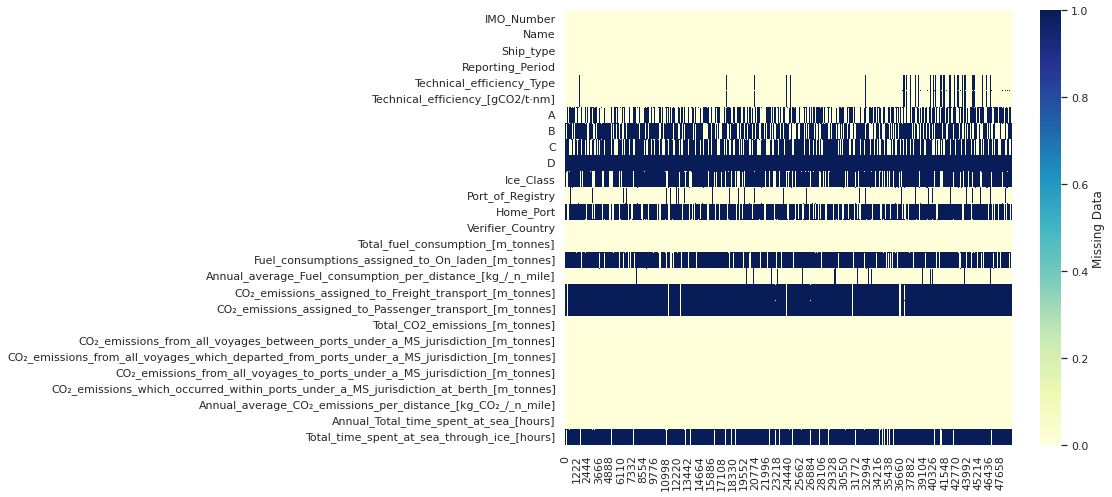

In [14]:
#Plotting Missing Values
plt.figure(figsize=(10,8))
sns.heatmap(df.isna().transpose(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

A,B,C,D are the methods of Monitoring of fuel consumption.

* Method A: BDN and periodic stocktakes of fuel tanks, 
* Method B: Bunker fuel tank
monitoring
* Method C: Flow meters for applicable combustion processes 
* Method D: Direct CO2 emissions measurement

Reference :  Annex I of EU Regulation 2016/1927  https://eur-lex.europa.eu/legal-content/EN/TXT/PDF/?uri=CELEX:32016R1927&from=EN

Not all the Ships are Ice class. Instead of Dropping the Ice Class and Total time spent at sea through ice (hours) columns, filled with 0. 
Replacing 'Yes' with 1 and blanks in the A,B,C,D with 0 (Binary encoding)




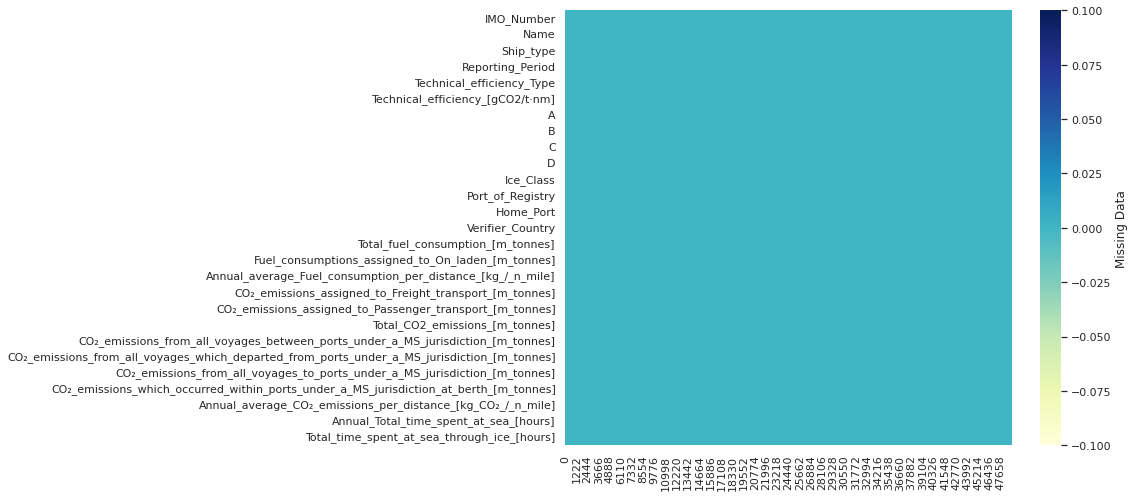

In [15]:
##Replacing Nan with 0

#Note: Replacing the 'Port_of_Registry', 'Home_Port' and 'Ice Class' nan valus with 'No'
#Later, Sklearn's label encoder converting it to integer 0 value along with other categorical/object values (IA,IB,PC1,..etc)

#replacing categorical fetaure nan values with str No
df['Port_of_Registry'] = df['Port_of_Registry'].fillna('No')
df['Home_Port'] = df['Home_Port'].fillna('No')
df['Ice_Class'] = df['Ice_Class'].fillna('No')

#replacing numerical fetaure nan values with 0
df['Technical_efficiency_[gCO2/t·nm]'] = df['Technical_efficiency_[gCO2/t·nm]'].fillna(0)
df['Fuel_consumptions_assigned_to_On_laden_[m_tonnes]'] = df['Fuel_consumptions_assigned_to_On_laden_[m_tonnes]'].fillna(0)
df['Total_time_spent_at_sea_through_ice_[hours]'] = df['Total_time_spent_at_sea_through_ice_[hours]'].fillna(0)
df['Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile]'] = df['Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile]'].fillna(0)
df['CO₂_emissions_assigned_to_Freight_transport_[m_tonnes]'] = df['CO₂_emissions_assigned_to_Freight_transport_[m_tonnes]'].fillna(0)
df['CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes]'] = df['CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes]'].fillna(0)
df['Annual_average_CO₂_emissions_per_distance_[kg_CO₂_/_n_mile]'] = df['Annual_average_CO₂_emissions_per_distance_[kg_CO₂_/_n_mile]'].fillna(0)

#replacing/mapping EIV and EEDI with int 1 and 2 respct.
df['Technical_efficiency_Type'] = df['Technical_efficiency_Type'].map({'EIV': 1, 'EEDI': 2})

#replacing/mapping yes with int 1
df['A'] = df['A'].map({'Yes': 1})
df['B'] = df['B'].map({'Yes': 1})
df['C'] = df['C'].map({'Yes': 1})
df['D'] = df['D'].map({'Yes': 1})

#Replacing Nan with 0
df['Technical_efficiency_Type'] = df['Technical_efficiency_Type'].fillna(0)
df['A'] = df['A'].fillna(0)
df['B'] = df['B'].fillna(0)
df['C'] = df['C'].fillna(0)
df['D'] = df['D'].fillna(0)
                      
#Re-Plotting Missing Values
plt.figure(figsize=(10,8))
sns.heatmap(df.isna().transpose(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

In [16]:
df.head()

,IMO_Number,Name,Ship_type,Reporting_Period,Technical_efficiency_Type,Technical_efficiency_[gCO2/t·nm],A,B,C,D,...,CO₂_emissions_assigned_to_Freight_transport_[m_tonnes],CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes],Total_CO2_emissions_[m_tonnes],CO₂_emissions_from_all_voyages_between_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_which_departed_from_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_which_occurred_within_ports_under_a_MS_jurisdiction_at_berth_[m_tonnes],Annual_average_CO₂_emissions_per_distance_[kg_CO₂_/_n_mile],Annual_Total_time_spent_at_sea_[hours],Total_time_spent_at_sea_through_ice_[hours]
0,6703343,EQUALITY,Other ship types,2021-01-01,1.0,57.84,1.0,0.0,0.0,0.0,...,0.00,0.00,1184.62,0.00,889.0,247.0,48.00,222.80,594.00,0.0
1,7037806,IONIAN STAR,Ro-pax ship,2021-01-01,1.0,19.40,1.0,0.0,0.0,0.0,...,2176.23,3264.35,6097.81,5440.71,0.0,0.0,657.23,263.01,1771.00,0.0
2,7043843,TALOS,Ro-ro ship,2021-01-01,1.0,48.71,1.0,0.0,1.0,0.0,...,0.00,0.00,6674.22,6431.85,0.0,0.0,242.37,185.05,2992.36,0.0
3,7128332,SEA WIND,Ro-pax ship,2021-01-01,1.0,9.29,1.0,0.0,0.0,0.0,...,6182.66,2082.82,10454.38,8265.50,0.0,0.0,2001.71,296.12,2737.00,0.0
4,7226952,FJARDVAGEN,Ro-ro ship,2021-01-01,1.0,43.00,1.0,0.0,0.0,0.0,...,0.00,0.00,5355.81,4596.60,0.0,0.0,759.20,157.51,2494.00,0.0


Skewness: 171.988744
Kurtosis: 33300.341039


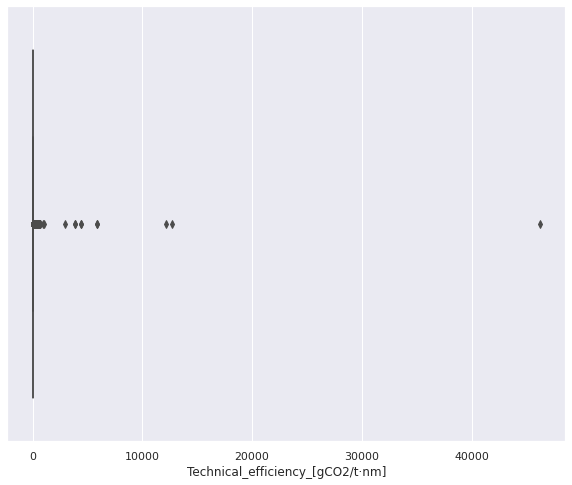

In [17]:
#Plotting box plot for Technical Effieiecny to visualize Quantiles and Median
sns.set_style("darkgrid")
plt.figure( figsize=(10,8))

sns.boxplot( df['Technical_efficiency_[gCO2/t·nm]'], data = df)

print("Skewness: %f" % df['Technical_efficiency_[gCO2/t·nm]'].skew())
print("Kurtosis: %f" % df['Technical_efficiency_[gCO2/t·nm]'].kurt())

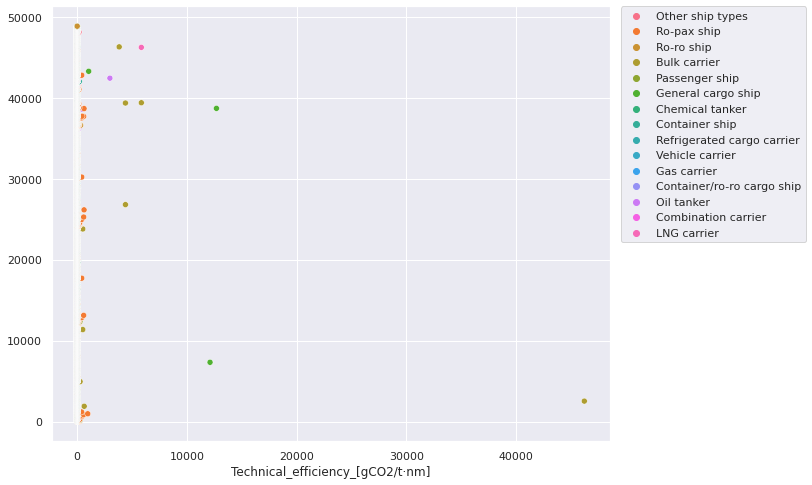

In [18]:
#Scatterplot
plt.figure(figsize = (10,8))
sns.set_style('darkgrid')
sns.scatterplot(x = df['Technical_efficiency_[gCO2/t·nm]'], y = df.index, data = df, hue = 'Ship_type')
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

The 'Ro-Ro Pax', 'Ro-Ro', 'General Cargo' , 'LNG carrier', 'Oil Tanker' having outliers in the dataset, resulting Kurtosis > 3.

In [19]:
df['Technical_efficiency_[gCO2/t·nm]'].describe()

count    48848.000000
mean        12.239321
std        230.739810
min          0.000000
25%          4.040000
50%          6.540000
75%         13.680000
max      46222.000000
Name: Technical_efficiency_[gCO2/t·nm], dtype: float64

The above box plot is not giving significant value of the median as the data is highly skewed and has leptokurtic distribution (Kurtosis > 3)

In [20]:
from scipy import stats
#Removing Outliers from the Technical_efficiency using Quantile filteration method

# 1st percentile
q_low = df['Technical_efficiency_[gCO2/t·nm]'].quantile(0.01)

#99th percentile
q_hi  = df['Technical_efficiency_[gCO2/t·nm]'].quantile(0.99)

#filteration
df_filtered = df[(df['Technical_efficiency_[gCO2/t·nm]'] < q_hi)]
df_filtered.head()

,IMO_Number,Name,Ship_type,Reporting_Period,Technical_efficiency_Type,Technical_efficiency_[gCO2/t·nm],A,B,C,D,...,CO₂_emissions_assigned_to_Freight_transport_[m_tonnes],CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes],Total_CO2_emissions_[m_tonnes],CO₂_emissions_from_all_voyages_between_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_which_departed_from_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_which_occurred_within_ports_under_a_MS_jurisdiction_at_berth_[m_tonnes],Annual_average_CO₂_emissions_per_distance_[kg_CO₂_/_n_mile],Annual_Total_time_spent_at_sea_[hours],Total_time_spent_at_sea_through_ice_[hours]
1,7037806,IONIAN STAR,Ro-pax ship,2021-01-01,1.0,19.40,1.0,0.0,0.0,0.0,...,2176.23,3264.35,6097.81,5440.71,0.0,0.0,657.23,263.01,1771.00,0.0
3,7128332,SEA WIND,Ro-pax ship,2021-01-01,1.0,9.29,1.0,0.0,0.0,0.0,...,6182.66,2082.82,10454.38,8265.50,0.0,0.0,2001.71,296.12,2737.00,0.0
6,7310507,FIDELITY,Other ship types,2021-01-01,1.0,31.13,1.0,0.0,0.0,0.0,...,0.00,0.00,2720.30,0.00,1585.0,1094.0,41.00,166.32,1431.00,0.0
7,7325095,LAMPEDUSA,Ro-pax ship,2021-01-01,1.0,35.34,0.0,1.0,0.0,0.0,...,5825.43,41.52,5866.95,2746.19,0.0,0.0,3120.74,358.58,1272.25,0.0
9,7350090,MOBY NIKI,Ro-pax ship,2021-01-01,1.0,7.61,1.0,0.0,0.0,0.0,...,1235.02,6784.51,8019.53,5630.94,0.0,0.0,2388.59,374.10,1582.27,0.0


In [21]:
#Lets compare the results of original technical eff with filtered technical efficiency after filtering the outliers
df_compare = pd.DataFrame()
df_compare['Original_Technical_efficiency'] = df['Technical_efficiency_[gCO2/t·nm]']
df_compare['Filtered_Technical_efficiency'] = df_filtered['Technical_efficiency_[gCO2/t·nm]']
df_compare.head()

,Original_Technical_efficiency,Filtered_Technical_efficiency
0,57.84,NaN
1,19.40,19.40
2,48.71,NaN
3,9.29,9.29
4,43.00,NaN


In [22]:
#Keeping the NaN values in the df_compare dataframe
df_compare.describe()

,Original_Technical_efficiency,Filtered_Technical_efficiency
count,48848.000000,48359.000000
mean,12.239321,9.322444
std,230.739810,7.811636
min,0.000000,0.000000
25%,4.040000,4.020000
50%,6.540000,6.460000
75%,13.680000,13.430000
max,46222.000000,42.730000


The STD of the quantile filtered technical eff < STD of original technical eff 

Skewness: 1.376622
Kurtosis: 1.800682


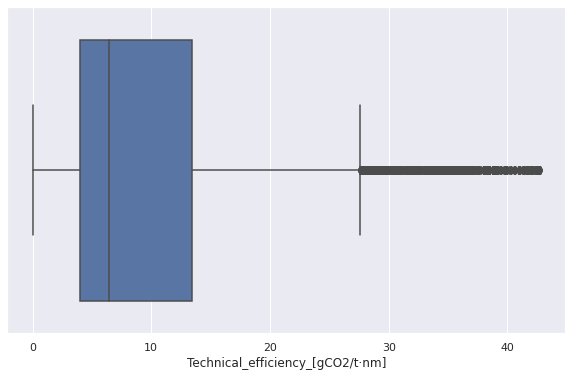

In [23]:
plt.figure( figsize=(10,6))

sns.boxplot( df_filtered['Technical_efficiency_[gCO2/t·nm]'], data = df_filtered)

print("Skewness: %f" % df_filtered['Technical_efficiency_[gCO2/t·nm]'].skew())
print("Kurtosis: %f" % df_filtered['Technical_efficiency_[gCO2/t·nm]'].kurt())

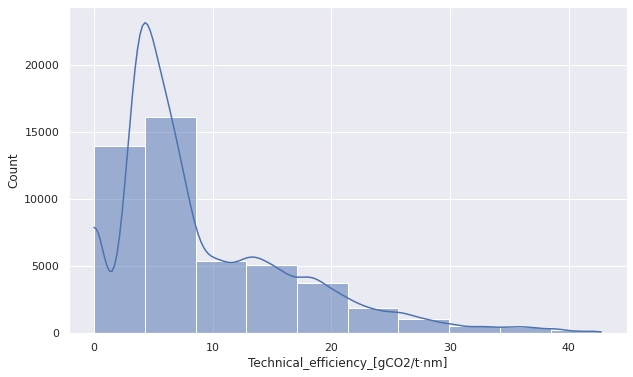

In [24]:
plt.figure( figsize=(10,6))
sns.histplot( df_filtered['Technical_efficiency_[gCO2/t·nm]'], kde = True, bins = 10 )
plt.show()

Before Inter Quartile Range (IQR) filter:
Skewness: 171.988744
Kurtosis: 33300.341039
After Inter Quartile Range (IQR) filter:
Skewness: 1.376622
Kurtosis: 1.800682


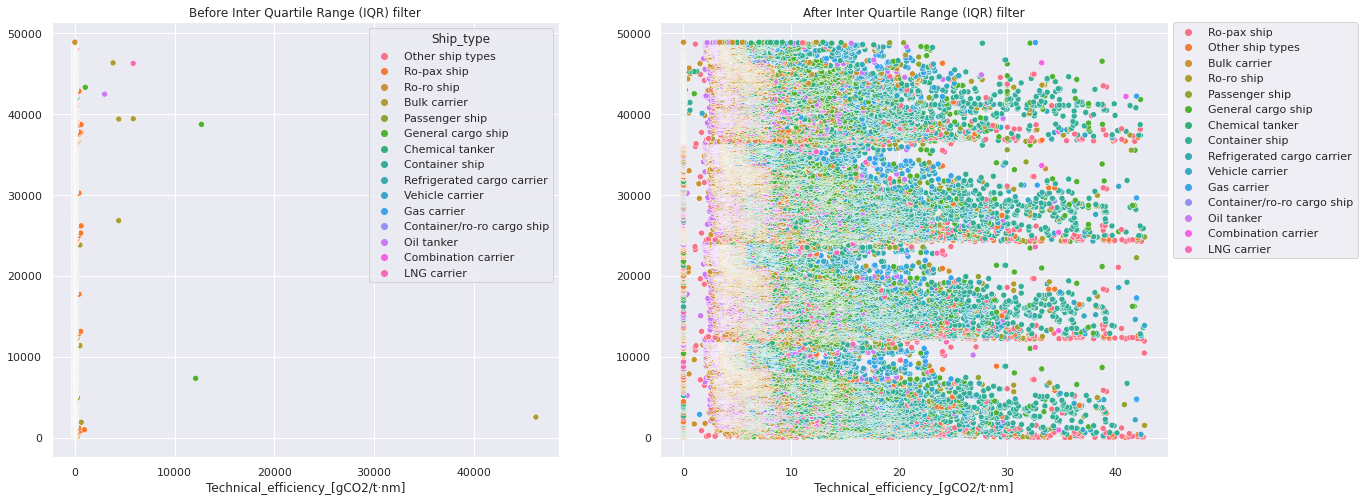

In [25]:
#Scatterplot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))

ax1.set_title('Before Inter Quartile Range (IQR) filter')
sns.scatterplot( x = df['Technical_efficiency_[gCO2/t·nm]'], y = df.index, data = df, hue = 'Ship_type', ax=ax1)

ax2.set_title('After Inter Quartile Range (IQR) filter')
sns.scatterplot(x = df_filtered['Technical_efficiency_[gCO2/t·nm]'], y = df_filtered.index, data = df_filtered, hue = 'Ship_type', ax=ax2)

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

#place legend outside top right corner of plot
print('Before Inter Quartile Range (IQR) filter:')
print("Skewness: %f" % df['Technical_efficiency_[gCO2/t·nm]'].skew())
print("Kurtosis: %f" % df['Technical_efficiency_[gCO2/t·nm]'].kurt())
print('After Inter Quartile Range (IQR) filter:')
print("Skewness: %f" % df_filtered['Technical_efficiency_[gCO2/t·nm]'].skew())
print("Kurtosis: %f" % df_filtered['Technical_efficiency_[gCO2/t·nm]'].kurt())

## Comparative analysis and feature selection





In [26]:
#check Datatypes amd null value of df_filtered
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48359 entries, 1 to 48847
Data columns (total 27 columns):
 #   Column                                                                                       Non-Null Count  Dtype         
---  ------                                                                                       --------------  -----         
 0   IMO_Number                                                                                   48359 non-null  int64         
 1   Name                                                                                         48359 non-null  object        
 2   Ship_type                                                                                    48359 non-null  object        
 3   Reporting_Period                                                                             48359 non-null  datetime64[ns]
 4   Technical_efficiency_Type                                                                    48359 non-null  flo

### Hadnling Categorical Features

Categorical Features : Name, Ship_type, Verifier Country, Ice Class, Home_Port, Port_of_Registry, etc.

In [27]:
#Unique Name values
print('Unique Name values:' , df_filtered.Name.unique())
print('Length of Unique Name values :' , len(df_filtered.Name.unique()))

Unique Name values: ['IONIAN STAR' 'SEA WIND' 'FIDELITY' ... 'BW RADON' 'SOUTHGATE'
 'MSXT ATHENA']
Length of Unique Name values : 19352


In [28]:
#Unique Ship_type values
print('Unique Ship_type values:' , df_filtered.Ship_type.unique())
print('Length of Unique Ship_type values :' , len(df_filtered.Ship_type.unique()))

Unique Ship_type values: ['Ro-pax ship' 'Other ship types' 'Bulk carrier' 'Ro-ro ship'
 'Passenger ship' 'General cargo ship' 'Chemical tanker' 'Container ship'
 'Refrigerated cargo carrier' 'Vehicle carrier' 'Gas carrier'
 'Container/ro-ro cargo ship' 'Oil tanker' 'Combination carrier'
 'LNG carrier']
Length of Unique Ship_type values : 15


In [29]:
#Unique Ice_Class values
print('Unique Ice_Class values:' , df_filtered.Ice_Class.unique())
print('Length of Unique Ice_Class values :' , len(df_filtered.Ice_Class.unique()))

Unique Ice_Class values: ['No' 'IB' 'IC' 'IA' 'IA Supper' 'PC4' 'PC1' 'PC7' 'PC3' 'PC5' 'PC2' 'PC6']
Length of Unique Ice_Class values : 12


In [30]:
#Unique Verifier_Country values
print('Unique Verifier_Country values:' , df_filtered.Verifier_Country.unique())
print('Length of Unique Verifier_Country values :' , len(df_filtered.Verifier_Country.unique()))

Unique Verifier_Country values: ['France' 'Greece' 'Italy' 'Germany' 'Croatia' 'China' 'Japan'
 'Korea, Republic of' 'Russian Federation' 'India' 'Portugal' 'Poland'
 'Sweden' 'United Kingdom']
Length of Unique Verifier_Country values : 14


In [31]:
#Unique Port_of_Registry values
print('Length of Unique Port_of_Registry values :' , len(df_filtered.Port_of_Registry.unique()))

Length of Unique Port_of_Registry values : 716


In [32]:
#Unique Home_Port values
print('Length of Unique Home_Port values :' , len(df_filtered.Home_Port.unique()))

Length of Unique Home_Port values : 394


### Label Encoding: Categorical Feature

In [33]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Name'.
df_filtered['Name']= label_encoder.fit_transform(df_filtered['Name'])
  
df_filtered['Name'].unique()

array([ 8425, 15443,  6156, ...,  2990, 16320, 11934])

In [34]:
# Encode labels in column 'Name'.
df_filtered['Ship_type']= label_encoder.fit_transform(df_filtered['Ship_type'])
  
df_filtered['Ship_type'].unique()

array([12,  9,  0, 13, 10,  6,  1,  3, 11, 14,  5,  4,  8,  2,  7])

In [35]:
# Encode labels in column 'Ice_Class'.
df_filtered['Ice_Class']= label_encoder.fit_transform(df_filtered['Ice_Class'])
  
df_filtered['Ice_Class'].unique()

array([ 4,  2,  3,  0,  1,  8,  5, 11,  7,  9,  6, 10])

In [36]:
# Encode labels in column 'Verifier_Country'.
df_filtered['Verifier_Country']= label_encoder.fit_transform(df_filtered['Verifier_Country'])
  
df_filtered['Verifier_Country'].unique()

array([ 2,  4,  6,  3,  1,  0,  7,  8, 11,  5, 10,  9, 12, 13])

In [37]:
# Encode labels in column 'Reporting_Period'.
df_filtered['Port_of_Registry']= label_encoder.fit_transform(df_filtered['Port_of_Registry'])
  
df_filtered['Port_of_Registry'].unique()

array([435, 604,  61, 108, 409, 104, 380, 411, 292, 641, 289, 486, 316,
       445, 493, 189, 558, 301, 497,  94, 267, 121, 637, 313, 365, 160,
       187, 434, 656, 673, 317, 534, 694, 628, 164, 419, 327, 358, 425,
       155, 350, 394, 455, 446, 224,  67, 439,  74, 250, 408, 286,  80,
       605,  15, 635, 618, 235, 485,  20, 392, 623, 584, 338, 616,  35,
        69,  78, 463, 125, 124, 457, 530,  38, 464,  60, 321, 276, 602,
        63, 344,  82, 103, 223, 221, 118, 369, 444, 359, 251,  88, 538,
       681, 713, 193, 101, 300, 698, 403, 366,  59, 498, 212, 229,  21,
        28, 198, 587, 153, 550, 525, 178, 677, 606,  24,   9, 274, 686,
        47, 141, 658, 222, 255, 257, 481,  32, 454, 252, 154, 510, 331,
       570, 205, 591, 295, 133, 106, 491, 173, 183, 595, 706, 470, 442,
       624, 278, 176, 472, 191, 259, 648, 218, 583,  43, 714,  19, 511,
       373,  98, 151, 526,  45, 219, 374,  44, 322, 232,  46,  79, 543,
       613,  86, 211, 619, 504, 566,  37, 599,  96,  97, 320, 29

In [38]:
# Encode labels in column 'Home_Port'.
df_filtered['Home_Port']= label_encoder.fit_transform(df_filtered['Home_Port'])
  
df_filtered['Home_Port'].unique()

array([254, 327, 244,  72, 242,  31, 259, 279, 118, 213, 218,  17, 359,
       185,  46, 340, 227, 214, 207, 372, 240, 150,  77, 257,  56, 110,
        61, 167, 345, 328,   6, 333, 278, 219, 292, 321, 192, 171,  52,
       343,  59, 271,  27, 325,  48, 221, 215, 151, 258,  66,  14, 375,
        69,  39,  47,  45, 197, 136,  12,  18,  23, 231, 183, 323, 289,
        16, 274, 383, 275,  32,  82, 203, 133, 230, 281, 174,  87, 109,
       386, 140, 111,  37, 351, 100, 123, 131, 265,   9, 378,  95, 223,
        92,  60, 300, 342, 270,  26, 191, 235,  35, 170, 122, 134,   0,
       382, 313, 152, 168, 193, 305, 186, 190,  65,   5,  29, 341, 142,
        63, 269, 112, 352, 245, 114,  90,  50, 211,  25, 182, 126, 177,
       316, 138, 346,  30, 154,  91, 317,  33, 273, 339, 246, 209, 163,
       392, 161, 125, 370, 311, 302, 226, 293, 376, 222, 369,   2, 208,
       248,  86, 159, 202, 363, 332, 115, 132, 146, 187, 249,  73, 294,
       233, 263, 308, 309, 318, 217, 358, 128, 166,  43, 326,  9

In [39]:
df_filtered.dtypes

IMO_Number                                                                                              int64
Name                                                                                                    int64
Ship_type                                                                                               int64
Reporting_Period                                                                               datetime64[ns]
Technical_efficiency_Type                                                                             float64
Technical_efficiency_[gCO2/t·nm]                                                                      float64
A                                                                                                     float64
B                                                                                                     float64
C                                                                                                     float64
D         

### Correlation Matrix

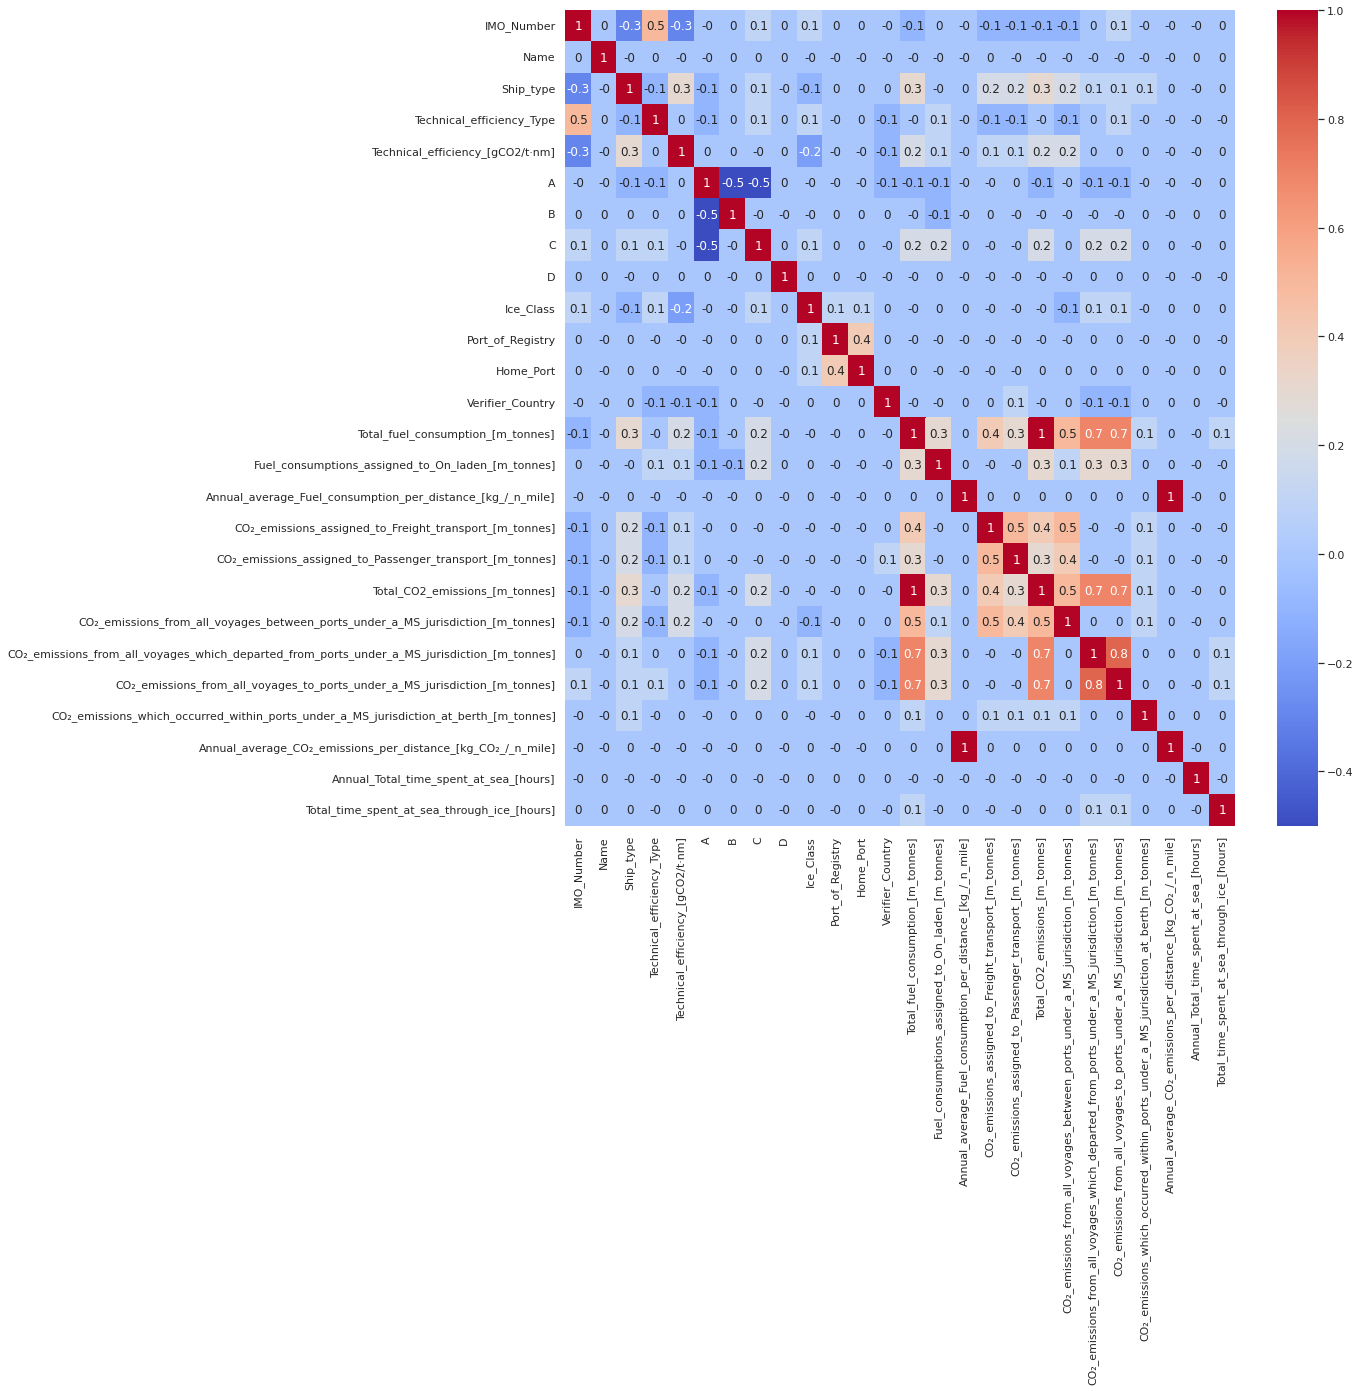

In [40]:
#Calculating the correation using pandas in-built function corr()
corr = round(df_filtered.corr(),1)

#Seaborn heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr,cmap='coolwarm', annot=True)

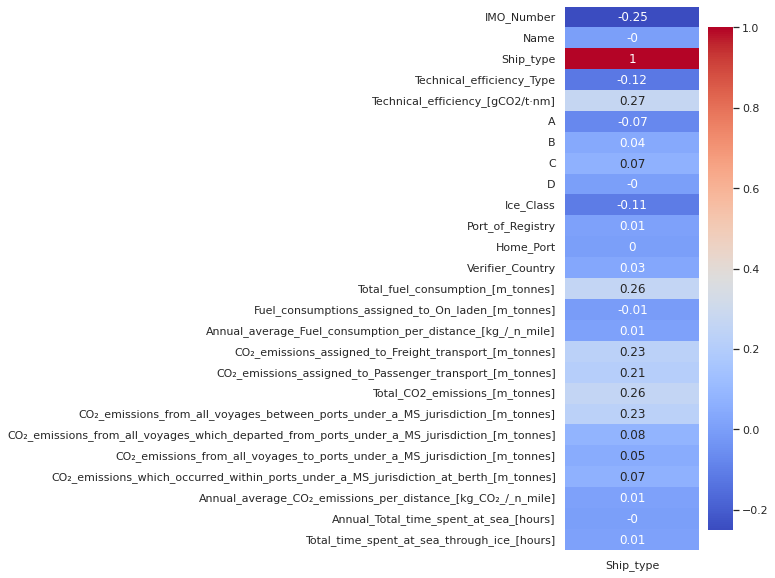

In [41]:
#correlation with respect to Ship_type
corr = round(df_filtered.corr()[['Ship_type']], 2)
plt.figure(figsize=(3, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [42]:
df_filtered.head()

,IMO_Number,Name,Ship_type,Reporting_Period,Technical_efficiency_Type,Technical_efficiency_[gCO2/t·nm],A,B,C,D,...,CO₂_emissions_assigned_to_Freight_transport_[m_tonnes],CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes],Total_CO2_emissions_[m_tonnes],CO₂_emissions_from_all_voyages_between_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_which_departed_from_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_which_occurred_within_ports_under_a_MS_jurisdiction_at_berth_[m_tonnes],Annual_average_CO₂_emissions_per_distance_[kg_CO₂_/_n_mile],Annual_Total_time_spent_at_sea_[hours],Total_time_spent_at_sea_through_ice_[hours]
1,7037806,8425,12,2021-01-01,1.0,19.40,1.0,0.0,0.0,0.0,...,2176.23,3264.35,6097.81,5440.71,0.0,0.0,657.23,263.01,1771.00,0.0
3,7128332,15443,12,2021-01-01,1.0,9.29,1.0,0.0,0.0,0.0,...,6182.66,2082.82,10454.38,8265.50,0.0,0.0,2001.71,296.12,2737.00,0.0
6,7310507,6156,9,2021-01-01,1.0,31.13,1.0,0.0,0.0,0.0,...,0.00,0.00,2720.30,0.00,1585.0,1094.0,41.00,166.32,1431.00,0.0
7,7325095,9517,12,2021-01-01,1.0,35.34,0.0,1.0,0.0,0.0,...,5825.43,41.52,5866.95,2746.19,0.0,0.0,3120.74,358.58,1272.25,0.0
9,7350090,11268,12,2021-01-01,1.0,7.61,1.0,0.0,0.0,0.0,...,1235.02,6784.51,8019.53,5630.94,0.0,0.0,2388.59,374.10,1582.27,0.0


In [43]:
#Creating new dataframe df_test to store feature which have significant correlation with 'Ship_Type' (corr >= 20%)
df_test = pd.DataFrame()
df_test['Ship_type'] = df_filtered['Ship_type']
df_test['Technical_efficiency'] = df_filtered['Technical_efficiency_[gCO2/t·nm]']
df_test['Total_fuel_consumption'] = df_filtered['Total_fuel_consumption_[m_tonnes]']
df_test['Annual_average_Fuel_consumption_per_distance'] = df_filtered['Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile]']
df_test['Total_CO2_emissions'] = df_filtered['Total_CO2_emissions_[m_tonnes]']
df_test['CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction'] = df_filtered['CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction_[m_tonnes]']

df_test.head()

,Ship_type,Technical_efficiency,Total_fuel_consumption,Annual_average_Fuel_consumption_per_distance,Total_CO2_emissions,CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction
1,12,19.40,1902.00,82.04,6097.81,0.0
3,12,9.29,3299.89,93.47,10454.38,0.0
6,9,31.13,860.30,52.60,2720.30,1094.0
7,12,35.34,1829.99,111.85,5866.95,0.0
9,12,7.61,2538.80,118.43,8019.53,0.0


In [44]:
df_test.columns #column names

Index(['Ship_type', 'Technical_efficiency', 'Total_fuel_consumption',
       'Annual_average_Fuel_consumption_per_distance', 'Total_CO2_emissions',
       'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction'],
      dtype='object')

# K means clustering

In [45]:
#final Check of Missing Value
missing_value = df_test.isnull().sum().values.sum()

if missing_value == 0:
  print('\n Missing Values: No Missing Values')
else:
  print('\n Missing Values:', missing_value)


 Missing Values: No Missing Values


In [46]:
#Sclaing
from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler(feature_range=(0,1))

# fit scaler on data
scaler.fit(df_test[['Ship_type', 'Technical_efficiency', 'Total_fuel_consumption',
       'Annual_average_Fuel_consumption_per_distance', 'Total_CO2_emissions',
       'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction']])

# apply transform
df_test[['Ship_type', 'Technical_efficiency', 'Total_fuel_consumption',
       'Annual_average_Fuel_consumption_per_distance', 'Total_CO2_emissions',
       'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction']] = scaler.transform(df_test[['Ship_type', 'Technical_efficiency', 'Total_fuel_consumption',
                                                                                                    'Annual_average_Fuel_consumption_per_distance', 'Total_CO2_emissions',
                                                                                                    'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction']])
df_test

,Ship_type,Technical_efficiency,Total_fuel_consumption,Annual_average_Fuel_consumption_per_distance,Total_CO2_emissions,CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction
1,0.857143,0.454014,0.019316,0.000114,0.019329,0.000000
3,0.857143,0.217412,0.033513,0.000130,0.033138,0.000000
6,0.642857,0.728528,0.008737,0.000073,0.008623,0.003043
7,0.857143,0.827054,0.018585,0.000156,0.018597,0.000000
9,0.857143,0.178095,0.025784,0.000165,0.025420,0.000000
...,...,...,...,...,...,...
48843,0.071429,0.302598,0.002521,0.000050,0.002462,0.000963
48844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
48845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
48846,0.071429,0.214369,0.005043,0.001021,0.004919,0.003232


### Elbow Plot

Text(0, 0.5, 'Sum of squared error')

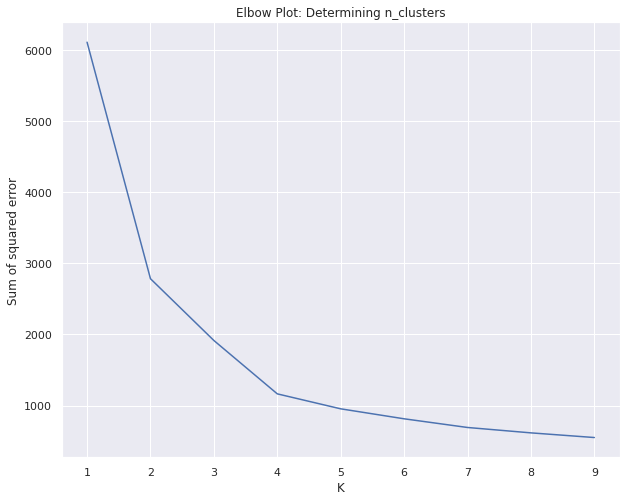

In [47]:
from sklearn.cluster import KMeans

#Create an empty list to store the out of the KMeans
store_result = []

#iteration range
cluster_range = range(1,10)

#initialize the for loop
for i in cluster_range:

  # fit the kmeans algo when n = 1,2,3...9
    kmeans_cluster = KMeans(n_clusters=i)

    kmeans_cluster.fit(df_test[['Ship_type', 'Technical_efficiency', 'Total_fuel_consumption',
       'Annual_average_Fuel_consumption_per_distance', 'Total_CO2_emissions',
       'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction']])
    
  #append the empty list with the result
    store_result.append(kmeans_cluster.inertia_)

# Elbow plot
sns.set(font_scale = 1)
plt.figure(figsize = (10,8))
plt.title('Elbow Plot: Determining n_clusters')
sns.lineplot(cluster_range,store_result)
plt.xlabel('K')
plt.ylabel('Sum of squared error')

The elbow method indicates our data has 2 or 4 clusters. 

In [48]:
#Assigning cluster size to 4 (Trial and error)
kmeans_cluster = KMeans(n_clusters=4)

y_predicted = kmeans_cluster.fit_predict(df_test[['Ship_type', 'Technical_efficiency', 'Total_fuel_consumption',
       'Annual_average_Fuel_consumption_per_distance', 'Total_CO2_emissions',
       'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction']])
y_predicted

array([3, 3, 3, ..., 1, 1, 3], dtype=int32)

In [49]:
#Storing KM cluster in the df_test
df_test['cluster']=y_predicted
df_test.head()

,Ship_type,Technical_efficiency,Total_fuel_consumption,Annual_average_Fuel_consumption_per_distance,Total_CO2_emissions,CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction,cluster
1,0.857143,0.454014,0.019316,0.000114,0.019329,0.000000,3
3,0.857143,0.217412,0.033513,0.000130,0.033138,0.000000,3
6,0.642857,0.728528,0.008737,0.000073,0.008623,0.003043,3
7,0.857143,0.827054,0.018585,0.000156,0.018597,0.000000,3
9,0.857143,0.178095,0.025784,0.000165,0.025420,0.000000,2


In [50]:
#Cluster Centers
kmeans_cluster.cluster_centers_

array([[2.81422044e-01, 4.36551855e-01, 4.90583763e-02, 1.76094881e-04,
        4.79345713e-02, 1.41599245e-02],
       [3.39110751e-02, 1.25836378e-01, 2.29090579e-02, 1.64163582e-04,
        2.24413532e-02, 8.33268374e-03],
       [5.59249967e-01, 1.17701741e-01, 3.96576831e-02, 2.77576117e-04,
        3.81980339e-02, 1.12885813e-02],
       [9.00851836e-01, 4.78133459e-01, 6.21095779e-02, 1.80831348e-04,
        6.07271480e-02, 8.81141820e-03]])

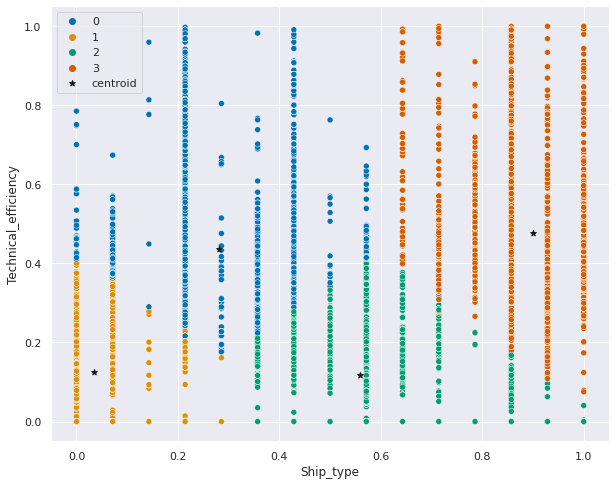

In [51]:
#Visualize the cluster with scatter plot
sns.set(font_scale = 1)
plt.figure(figsize = (10,8))
sns.scatterplot(data = df_test,x = df_test['Ship_type'], y = df_test['Technical_efficiency'], hue = 'cluster', palette='colorblind', legend='full' )

#plotting centroids on the same scatter plot
plt.scatter(kmeans_cluster.cluster_centers_[:,0],kmeans_cluster.cluster_centers_[:,1],color='k',marker='*',label='centroid')
plt.legend()

In [52]:
#Inverse transformation of df_test dataframe
df_test[['Ship_type', 'Technical_efficiency', 'Total_fuel_consumption',
       'Annual_average_Fuel_consumption_per_distance', 'Total_CO2_emissions',
       'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction']] = scaler.inverse_transform(df_test[['Ship_type', 'Technical_efficiency', 'Total_fuel_consumption',
                                                                                                    'Annual_average_Fuel_consumption_per_distance', 'Total_CO2_emissions',
                                                                                                    'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction']])

In [53]:
#Cross validate the inverse transform of df_test
df_test.head()

,Ship_type,Technical_efficiency,Total_fuel_consumption,Annual_average_Fuel_consumption_per_distance,Total_CO2_emissions,CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction,cluster
1,12.0,19.40,1902.00,82.04,6097.81,0.0,3
3,12.0,9.29,3299.89,93.47,10454.38,0.0,3
6,9.0,31.13,860.30,52.60,2720.30,1094.0,3
7,12.0,35.34,1829.99,111.85,5866.95,0.0,3
9,12.0,7.61,2538.80,118.43,8019.53,0.0,2


In [54]:
#Create Dataframe to rename all the column to plot the pair-plot
df_pairplot = df_test

#rename the columns
df_pairplot.rename(columns = {'Total_fuel_consumption':'Total_FC','Annual_average_Fuel_consumption_per_distance':'Avg.FC/Dist(Annual)', 'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction':'CO2_All_Voyages'}, inplace = True)

#columns
df_pairplot.columns

Index(['Ship_type', 'Technical_efficiency', 'Total_FC', 'Avg.FC/Dist(Annual)',
       'Total_CO2_emissions', 'CO2_All_Voyages', 'cluster'],
      dtype='object')

<Figure size 1440x1440 with 0 Axes>

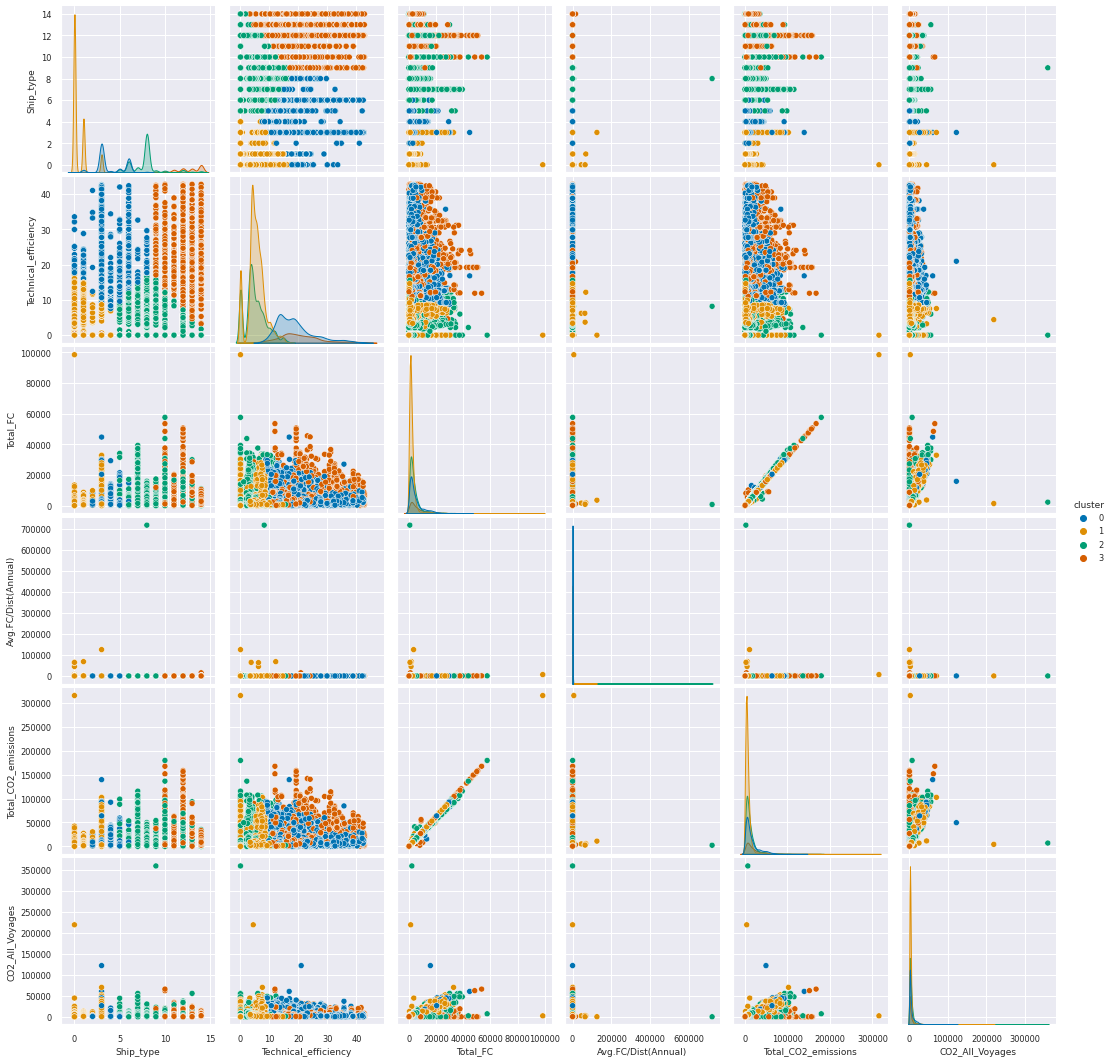

In [55]:
#@title Pair Plot
plt.figure(figsize = (20,20))
sns.set(font_scale = 0.75)
pp = sns.pairplot(df_pairplot, hue = 'cluster', palette='colorblind')
# pp.fig.suptitle("Pairplot w.r.t KM-Cluster")
plt.show()

# Data Preparation

In [56]:
#Assgin the independent variables/features to X
#Drop the 'cluster' feature
X = df_test.drop(['Ship_type', 'cluster'] ,axis='columns')

#Assgin dependent variabel 'Ship_type' in y
y = df_test.Ship_type

#X independent variables/ features
X.columns

Index(['Technical_efficiency', 'Total_FC', 'Avg.FC/Dist(Annual)',
       'Total_CO2_emissions', 'CO2_All_Voyages'],
      dtype='object')

In [57]:
#Assgin the independent variables/features to X_KM
#Include the 'cluster' feature
X_KM = df_test.drop('Ship_type' ,axis='columns')

#Assgin dependent variabel 'Ship_type' in y_KM
y_KM = df_test.Ship_type

#X_KM independent variables/features
X_KM.columns

Index(['Technical_efficiency', 'Total_FC', 'Avg.FC/Dist(Annual)',
       'Total_CO2_emissions', 'CO2_All_Voyages', 'cluster'],
      dtype='object')

## Train Test Split

In [58]:
#import train-test split
from sklearn.model_selection import train_test_split

##train test split. Test size = 20% , excluding 'cluster' column
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

#train test split. Test size = 20% , including 'cluster' column
X_KM_train, X_KM_test, y_KM_train, y_KM_test = train_test_split(X_KM,y_KM,test_size=0.20)

# RandomForest

In [59]:
#import Random Forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

#hyperparameter:
#n-estimator = 40, with trial and error 
#criterion = default (gini impurity) to measure the quality of a split

rf  = RandomForestClassifier(n_estimators=40)

#RandomForestClassifier including 'cluster' column
#fitting the training input
rf.fit(X_train, y_train)

#Storing the score in the variable
rfa = rf.score(X_test, y_test)

#printing result
print('Random Forest Model Accuracy, without KM clustering :',round(rfa,2)*100,'%')

Random Forest Model Accuracy, without KM clustering : 67.0 %


In [60]:
#import classisfication report for accuracy report
from sklearn.metrics import classification_report

predictions = rf.predict(X_test)

#Classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.71      0.85      0.77      2980
         1.0       0.47      0.41      0.44      1140
         2.0       0.00      0.00      0.00         9
         3.0       0.77      0.87      0.82      1455
         4.0       0.74      0.50      0.60        62
         5.0       0.35      0.16      0.22       255
         6.0       0.64      0.61      0.62       967
         7.0       0.76      0.56      0.65       190
         8.0       0.67      0.60      0.63      1508
         9.0       0.38      0.13      0.19       100
        10.0       0.73      0.51      0.60       115
        11.0       0.57      0.44      0.50       113
        12.0       0.78      0.72      0.75       247
        13.0       0.67      0.42      0.52       184
        14.0       0.53      0.56      0.54       347

    accuracy                           0.67      9672
   macro avg       0.58      0.49      0.52      9672
weighted avg       0.66   

In [61]:
#import KFold crossvalidation method from sklearn model selection
from sklearn.model_selection import cross_val_score

#Cross validation of RandomForestClassifier excluding 'cluster' column
Cross_Val = cross_val_score(RandomForestClassifier(n_estimators=40),X,y,cv=3)

#Average of k-fold validation and Storing the score in the variable
avg_rf =np.average(Cross_Val)

#printing result
print('Avg. Random Forest Model Accuracy, without KM clustering (Kfold =3):',round(avg_rf,2)*100,'%')

Avg. Random Forest Model Accuracy, without KM clustering (Kfold =3): 64.0 %


In [62]:
#hyperparameter:
#n-estimator = 40, with trial and error 
#criterion = default (gini impurity) to measure the quality of a split
rf_KM = RandomForestClassifier(n_estimators=40)

#RandomForestClassifier including 'cluster' column
#fitting the training input
rf_KM.fit(X_KM_train, y_KM_train)

#Storing the score in the variable
rfkm = rf_KM.score(X_KM_test, y_KM_test)

#printing result
print('Random Forest Model Accuracy, with KM clustering :', round(rfkm,2)*100,'%')

Random Forest Model Accuracy, with KM clustering : 82.0 %


In [63]:
#Classification report 
predictions_KM = rf_KM.predict(X_KM_test)

#printing result
print(classification_report(y_KM_test, predictions_KM))

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.89      2976
         1.0       0.73      0.52      0.61      1169
         2.0       0.00      0.00      0.00         4
         3.0       0.90      0.95      0.92      1491
         4.0       0.82      0.76      0.78        41
         5.0       0.51      0.31      0.38       241
         6.0       0.76      0.79      0.77       962
         7.0       0.84      0.77      0.80       188
         8.0       0.84      0.92      0.88      1511
         9.0       0.50      0.18      0.26       102
        10.0       0.65      0.60      0.62        97
        11.0       0.67      0.72      0.69        96
        12.0       0.87      0.80      0.83       260
        13.0       0.79      0.62      0.70       197
        14.0       0.74      0.83      0.78       337

    accuracy                           0.82      9672
   macro avg       0.70      0.65      0.66      9672
weighted avg       0.81   

In [64]:
#Cross validation of RandomForestClassifier including 'cluster' column
#KFold = 3
Cross_Val_KM =cross_val_score(RandomForestClassifier(n_estimators=40),X_KM,y_KM,cv=3)

#Average of k-fold validation and Storing the score in the variable
avg_rfkm =np.average(Cross_Val_KM)

#printing result
print('Avg. Random Forest Model Accuracy, with KM clustering (Kfold =3):',round(avg_rfkm,3)*100,'%')

Avg. Random Forest Model Accuracy, with KM clustering (Kfold =3): 80.4 %


# Logistic Regression

In [65]:
#importing Logistic Regression from sklearn

from sklearn.linear_model import LogisticRegression

#Hyperparameters: 
#solver = 'liblinear'
#multiclass parameter as One-vs.-rest (or one-vs-all, OvA) classifier

lr = LogisticRegression(solver='liblinear',multi_class='ovr')

#Logistic Regression excluding 'cluster' column
#fitting the training input
lr.fit(X_train, y_train)

#Storing the score in the variable
lra = lr.score(X_test, y_test)

#printing result
print('LogisticRegression Model Accuracy, without KM clustering :',round(lra,2)*100,'%')

LogisticRegression Model Accuracy, without KM clustering : 51.0 %


In [66]:
#Classification report 
predictions = lr.predict(X_test)

#printing result
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.50      0.89      0.64      2980
         1.0       0.34      0.04      0.07      1140
         2.0       0.00      0.00      0.00         9
         3.0       0.59      0.78      0.67      1455
         4.0       0.00      0.00      0.00        62
         5.0       0.00      0.00      0.00       255
         6.0       0.43      0.46      0.45       967
         7.0       0.80      0.52      0.63       190
         8.0       0.47      0.31      0.37      1508
         9.0       0.00      0.00      0.00       100
        10.0       0.50      0.01      0.02       115
        11.0       0.00      0.00      0.00       113
        12.0       0.52      0.40      0.46       247
        13.0       0.00      0.00      0.00       184
        14.0       0.00      0.00      0.00       347

    accuracy                           0.51      9672
   macro avg       0.28      0.23      0.22      9672
weighted avg       0.44   

In [67]:
#Cross validation of Logistic Regression excluding 'cluster' column
#KFold = 3
lr_Cross_Val = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X,y,cv=3)

#Average of k-fold validation and Storing the score in the variable
avg_lr =np.average(lr_Cross_Val)

#printing result
print('Avg. LogisticRegression Model Accuracy, without KM clustering (Kfold =3):',round(avg_lr,2)*100,'%')

Avg. LogisticRegression Model Accuracy, without KM clustering (Kfold =3): 46.0 %


In [68]:
#Logistic Regression including 'cluster' column
lr_KM = LogisticRegression(solver='liblinear',multi_class='ovr')

#fitting the training input
lr_KM.fit(X_KM_train, y_KM_train)

#Storing the score in the variable
lrkm = lr_KM.score(X_KM_test, y_KM_test)

#printing result
print('LogisticRegression Model Accuracy, with KM clustering :',round(lrkm,2)*100,'%')

LogisticRegression Model Accuracy, with KM clustering : 64.0 %


In [69]:
#Classification report 
predictions_KM = lr_KM.predict(X_KM_test)

#printing result
print(classification_report(y_KM_test, predictions_KM))

              precision    recall  f1-score   support

         0.0       0.70      0.91      0.79      2976
         1.0       0.66      0.07      0.13      1169
         2.0       0.00      0.00      0.00         4
         3.0       0.64      0.87      0.74      1491
         4.0       0.00      0.00      0.00        41
         5.0       0.00      0.00      0.00       241
         6.0       0.35      0.24      0.29       962
         7.0       0.78      0.55      0.64       188
         8.0       0.64      0.89      0.75      1511
         9.0       0.00      0.00      0.00       102
        10.0       0.75      0.03      0.06        97
        11.0       0.51      0.21      0.30        96
        12.0       0.62      0.57      0.60       260
        13.0       0.77      0.12      0.20       197
        14.0       0.57      0.68      0.62       337

    accuracy                           0.64      9672
   macro avg       0.47      0.34      0.34      9672
weighted avg       0.61   

In [70]:
#Cross validation of Logistic Regression including 'cluster' column
#KFold = 3
Lr_Cross_Val_KM =cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X_KM,y_KM,cv=3)

#Average of k-fold validation
avg_lrkm =np.average(Lr_Cross_Val_KM)

#printing result
print('Avg. LogisticRegression Model Accuracy, with KM clustering (Kfold =3):',round(avg_lrkm,2)*100,'%')


Avg. LogisticRegression Model Accuracy, with KM clustering (Kfold =3): 54.0 %


# Xg Boost


In [119]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
X_train.shape, X_test.shape

((38687, 5), (9672, 5))

In [120]:
from xgboost import XGBRegressor
import xgboost as xgb
model = XGBRegressor()
model.fit(X_train, y_train)

[17:24:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

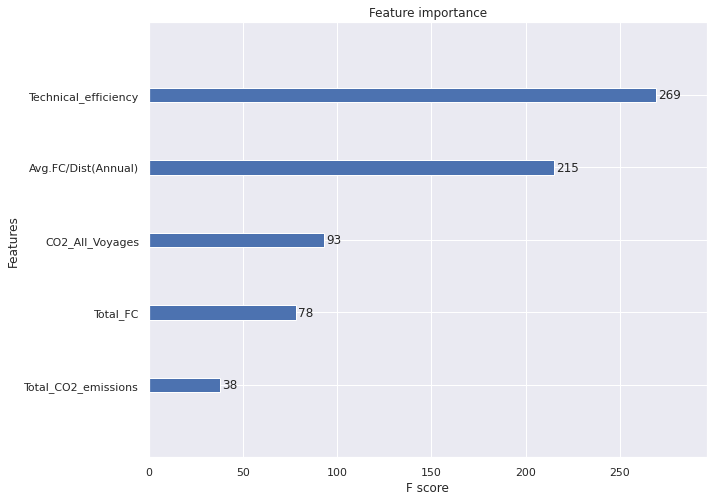

In [121]:
plt.figure(figsize = (10,8))
xgb.plot_importance(model, ax=plt.gca())

In [122]:
predictions = model.predict(X_test)
pred_train = model.predict(X_train)
from sklearn.metrics import mean_squared_error, r2_score  ## use function score   RMSE
#Training MSE
# print( r2_score(y_train, pred_train) ) # how much variance the model explains?
# print( mean_squared_error(y_train, pred_train) )  ##  lower -> better ?? 

# #Testing MSE
# model.score(X_test, y_test)  ## R^2
# print(r2_score(y_test, predictions))
# print(mean_squared_error(y_test, predictions))
xga = model.score(X_test, y_test)
#printing result
print('XGBoost Model Accuracy, without KM clustering :',round(xga,2)*100,'%')

XGBoost Model Accuracy, without KM clustering : 41.0 %


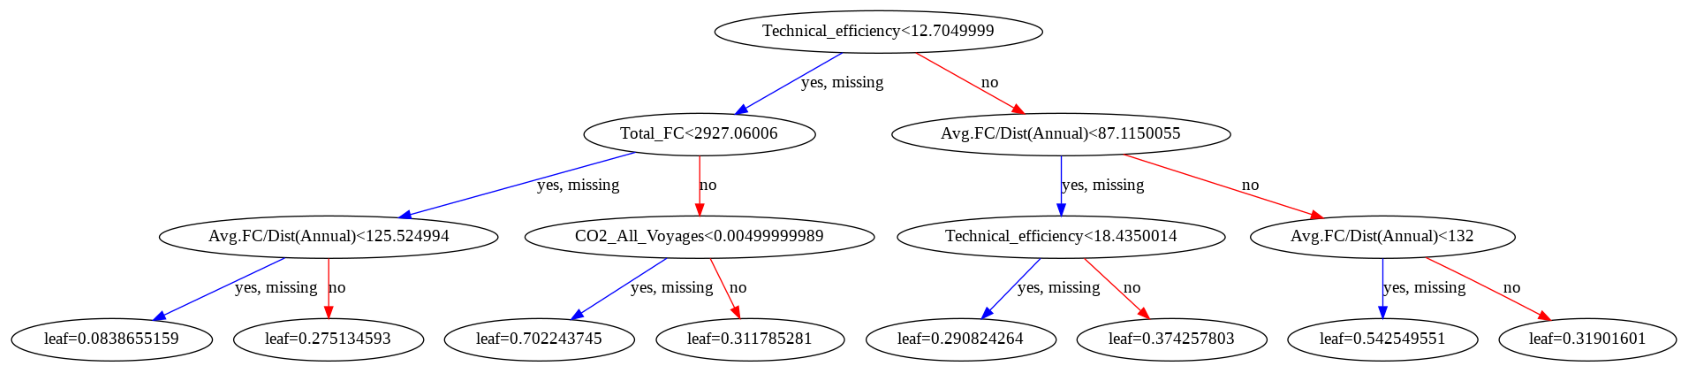

In [123]:
fig, ax = plt.subplots(figsize=(30, 30))

xgb.plot_tree(model, num_trees=4, ax=ax)

plt.show()

In [127]:
#Cross validation of Logistic Regression including 'cluster' column
#KFold = 3

xg_Cross_Val =cross_val_score(XGBRegressor(),X_train,y_train,cv=3)

#Average of k-fold validation
avg_xg =np.average(xg_Cross_Val)

#printing result
print('Avg. XGBoost Model Accuracy, with KM clustering (Kfold =3):',round(avg_xg,2)*100,'%')

[17:29:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:29:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:29:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Avg. XGBoost Model Accuracy, with KM clustering (Kfold =3): 41.0 %


[17:11:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


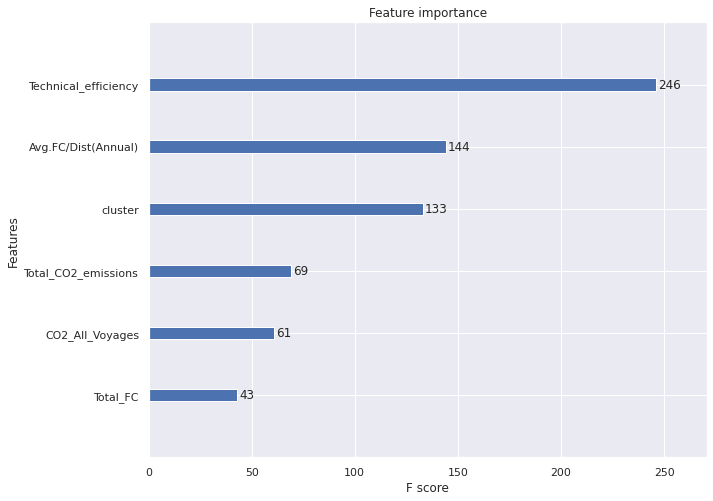

In [99]:
model_KM = XGBRegressor()
model_KM.fit(X_KM_train, y_KM_train)

plt.figure(figsize = (10,8))
xgb.plot_importance(model_KM, ax=plt.gca())

In [132]:
predictions = model_KM.predict(X_KM_test)
pred_train = model_KM.predict(X_KM_train)
from sklearn.metrics import mean_squared_error, r2_score  ## use function score   RMSE
# # Training MSE
# print( r2_score(y_KM_train, pred_train) ) # how much variance the model_KM explains?
# print( 'mean_squared_error',mean_squared_error(y_KM_train, pred_train) )  ##  lower -> better ?? 

# #Testing MSE
# model_KM.score(X_KM_test, y_KM_test)  ## R^2
# print(r2_score(y_KM_test, predictions))
# print('mean_squared_error',mean_squared_error(y_KM_test, predictions))

xgkm = model_KM.score(X_KM_test, y_KM_test)
#printing result
print('XGBoost Model Accuracy, with KM clustering :',round(xgkm,2)*100,'%')

0.9475352986688148
mean_squared_error 0.9113925011822224
0.9464559793283258
mean_squared_error 0.9221246933011511
XGBoost Model Accuracy, with KM clustering : 95.0 %


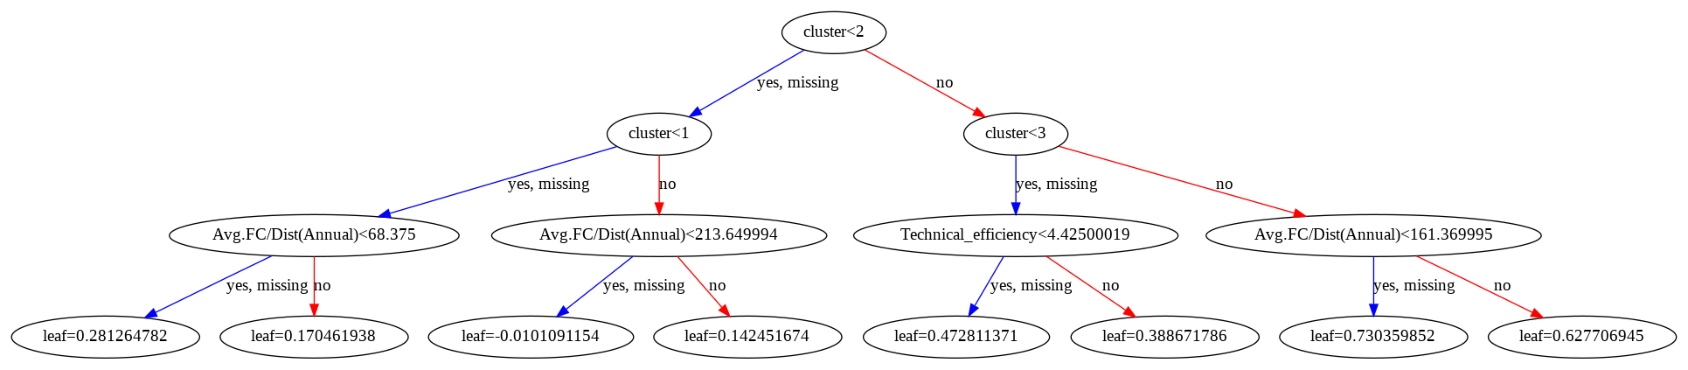

In [103]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(model_KM, num_trees=5, ax=ax)
plt.show()

In [113]:
#Cross validation of Logistic Regression including 'cluster' column
#KFold = 3

xg_Cross_Val_KM =cross_val_score(XGBRegressor(),X_KM,y_KM,cv=3)

#Average of k-fold validation
avg_xgkm =np.average(xg_Cross_Val_KM)

#printing result
print('Avg. XGBoost Model Accuracy, with KM clustering (Kfold =3):',round(avg_xgkm,2)*100,'%')


[17:20:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Avg. XGBoost Model Accuracy, with KM clustering (Kfold =3): 94.0 %


# Results Summary

In [128]:
#@title Summary Table

#Creating data summary for pandas dataframe
data = [['Random Forest', round(rfa,2)*100, round(avg_rf,2)*100], 
        ['Random Forest and KMeans Clustering', round(rfkm,2)*100 , round(avg_rfkm,2)*100], 
        ['Logistic Regression', round(lra,2)*100, round(avg_lr,2)*100], 
        ['Logistic Regression and Kmeans Clustering', round(lrkm,2)*100, round(avg_lrkm,2)*100],
        ['XGBoost', round(xga,2)*100, round(avg_xg,2)*100], 
        ['XGBoost and Kmeans Clustering', round(xgkm,2)*100, round(avg_xgkm,2)*100]
        ]
  
# Create the pandas DataFrame
df_summary = pd.DataFrame(data, columns=['Algorithm', 'Accuracy %', 'Avg Accuracy [Kfold = 3] %'])

#Transpose of the dataframe
df_summary

,Algorithm,Accuracy %,Avg Accuracy [Kfold = 3] %
0,Random Forest,67.0,64.0
1,Random Forest and KMeans Clustering,82.0,80.0
2,Logistic Regression,51.0,46.0
3,Logistic Regression and Kmeans Clustering,64.0,54.0
4,XGBoost,41.0,41.0
5,XGBoost and Kmeans Clustering,95.0,94.0
